In [120]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [121]:
#Read data
df = pd.read_csv("train.csv")

In [122]:
##Show column names
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [123]:
#Choose variables to use
X = pd.DataFrame()
X['pclass'] = df['Pclass']
X['fare'] = df['Fare']
X['survived'] = df['Survived']

In [124]:
#Drop missing values
X = X.dropna(axis=0)

In [125]:
#Assign the dependent variable y to be predicted
y = X['survived']
X = X.drop(['survived'], axis=1)

In [126]:
X

,pclass,fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
5,3,8.4583
6,1,51.8625
7,3,21.0750
8,3,11.1333
9,2,30.0708


In [127]:
#Drop one pclass_1, let the indicators of pclass_2 and pclass_3 become 1 or 0
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))
X = X.drop(['pclass_3', 'pclass'], axis=1)

In [128]:
X

,fare,pclass_1,pclass_2
0,7.2500,0,0
1,71.2833,1,0
2,7.9250,0,0
3,53.1000,1,0
4,8.0500,0,0
5,8.4583,0,0
6,51.8625,1,0
7,21.0750,0,0
8,11.1333,0,0
9,30.0708,0,1


In [129]:
#Scale features
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [130]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
#Create logistic model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [137]:
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
from sklearn.metrics import accuracy_score
print("Logistic accuracy: %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic accuracy: 0.72


In [145]:
#Base rate model
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y
y_base_rate = base_rate_model(X_test)

y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.59


In [146]:
#Model Comparison
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [147]:
print("---Base Model---")
#base rate AUC
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test,base_rate_model(X_test) ))
print("\n\n---Logistic Model---")
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, model.predict(X_test) ))

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.59      1.00      0.74       105
          1       0.00      0.00      0.00        74

avg / total       0.34      0.59      0.43       179



---Logistic Model---
Logistic AUC = 0.69
             precision    recall  f1-score   support

          0       0.72      0.84      0.78       105
          1       0.70      0.54      0.61        74

avg / total       0.71      0.72      0.71       179



C:\i\Dez\Programming\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [148]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

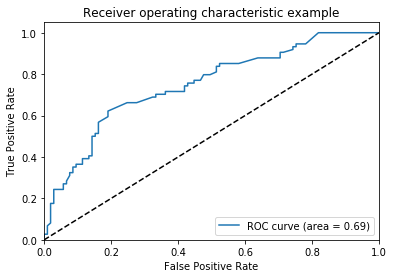

In [149]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()